In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
data = pd.read_csv('heart.csv')

In [10]:
data['sex'] = pd.Categorical(data['sex']).map({1:'Male',0:'Female'})
data['cp'] = pd.Categorical(data['cp']).map({0: 'typical angina', 1: 'atypical angina', 
                                             2: 'non-anginal pain', 3: 'asymptomatic' })
#data['fbs'] = data['fbs'].map({1: True, 0: False}).astype(bool)
data['restecg'] = pd.Categorical(data['restecg']).map({0: 'Normal' , 
                                                  1: 'ST-T wave abnormality' , 
                                                  2: 'Probable or definite left ventricular hypertrophy'})
#data['exang'] = data['exang'].map({1: True, 0: False}).astype(bool)
data['slope'] = pd.Categorical(data['slope']).map({0: 'Upsloping' , 
                                                  1: 'Flat' , 
                                                  2: 'Downsloping'})
data['ca']  = pd.Categorical(data['ca']).map({0: '0 CV' , 
                                                  1: '1 CV' , 
                                                  2: '2 CV',
                                                 3: '3 CV',
                                             4: np.nan})
data['thal'] = pd.Categorical(data['thal']).map({0: np.nan , 
                                                  1: 'Normal' , 
                                                  2: 'Fixed Defect',
                                                  3: 'Reversable Defect'})
data['target'] = pd.Categorical(data['target']).map({0:'Less than 50 %',
                                                     1:'More than 50 %'})

In [45]:
data.groupby(['sex','target']).size().reset_index(name = 'count')

,sex,target,count
0,Female,Less than 50 %,24
1,Female,More than 50 %,72
2,Male,Less than 50 %,114
3,Male,More than 50 %,93


In [51]:
a = data.groupby(['cp','sex']).size()

In [62]:
pd.crosstab(data.cp,data.sex).apply(lambda r: r/r.sum(), axis=0)

sex,Female,Male
cp,,
typical angina,0.406250,0.502415
atypical angina,0.187500,0.154589
non-anginal pain,0.364583,0.251208
asymptomatic,0.041667,0.091787


In [69]:
pd.crosstab(data.cp,data.target).apply(lambda r: r/r.sum(), axis=1)

target,Less than 50 %,More than 50 %
cp,,
typical angina,0.727273,0.272727
atypical angina,0.180000,0.820000
non-anginal pain,0.206897,0.793103
asymptomatic,0.304348,0.695652


In [70]:
pd.crosstab(data.slope,data.target).apply(lambda r: r/r.sum(), axis=1)

target,Less than 50 %,More than 50 %
slope,,
Upsloping,0.571429,0.428571
Flat,0.650000,0.350000
Downsloping,0.246479,0.753521


In [68]:
pd.crosstab(data.restecg,data.target).apply(lambda r: r/r.sum(), axis=1)

target,Less than 50 %,More than 50 %
restecg,,
Normal,0.537415,0.462585
ST-T wave abnormality,0.368421,0.631579
Probable or definite left ventricular hypertrophy,0.750000,0.250000


In [72]:
pd.crosstab(data.thal,data.target).apply(lambda r: r/r.sum(), axis=1)

target,Less than 50 %,More than 50 %
thal,,
Fixed Defect,0.216867,0.783133
Normal,0.666667,0.333333
Reversable Defect,0.760684,0.239316


In [87]:
pd.crosstab(data.thal,data.target).apply(lambda r: r/r.sum(), axis=1)

target,Less than 50 %,More than 50 %
thal,,
Fixed Defect,0.216867,0.783133
Normal,0.666667,0.333333
Reversable Defect,0.760684,0.239316


In [88]:
pd.crosstab(data.ca,data.target).apply(lambda r: r/r.sum(), axis=1)

target,Less than 50 %,More than 50 %
ca,,
0 CV,0.257143,0.742857
1 CV,0.676923,0.323077
2 CV,0.815789,0.184211
3 CV,0.850000,0.150000


In [32]:
data.groupby(['sex','cp','restecg','slope','thal','target']).size().reset_index(name = 'count')

,sex,cp,restecg,slope,thal,target,count
0,Female,typical angina,Normal,Upsloping,Fixed Defect,Less than 50 %,1
1,Female,typical angina,Normal,Upsloping,Reversable Defect,Less than 50 %,2
2,Female,typical angina,Normal,Flat,Fixed Defect,More than 50 %,6
3,Female,typical angina,Normal,Flat,Normal,Less than 50 %,1
4,Female,typical angina,Normal,Flat,Reversable Defect,Less than 50 %,6
5,Female,typical angina,Normal,Downsloping,Fixed Defect,Less than 50 %,1
6,Female,typical angina,Normal,Downsloping,Fixed Defect,More than 50 %,3
7,Female,typical angina,ST-T wave abnormality,Flat,Fixed Defect,Less than 50 %,5
8,Female,typical angina,ST-T wave abnormality,Flat,Fixed Defect,More than 50 %,3
9,Female,typical angina,ST-T wave abnormality,Flat,Reversable Defect,Less than 50 %,3


In [24]:
data.pivot_table(index = ['sex','cp','restecg','slope','thal'],
                 columns = 'target',
                  aggfunc=len)

age  \
target                                                                                                  Less than 50 %   
sex    cp               restecg                                           slope       thal                               
Female typical angina   Normal                                            Upsloping   Fixed Defect                 1.0   
                                                                                      Reversable Defect            2.0   
                                                                          Flat        Fixed Defect                 NaN   
                                                                                      Normal                       1.0   
                                                                                      Reversable Defect            6.0   
                                                                          Downsloping Fixed Defect                 1.0   
                        ST-T wave abnormality                             Flat        Fixed Defect                 5.0   
                                                                                      Reversable Defect            3.0   
                                                                          Downsloping Fixed Defect                 NaN   
                        Probable or definite left ventricular hypertrophy Flat        Fixed Defect                 1.0   
                                                                                      Reversable Defect            1.0   
       atypical angina  Normal                                            Flat        Fixed Defect                 1.0   
                                                                          Downsloping Fixed Defect                 1.0   
                        ST-T wave abnormality                             Flat        Fixed Defect                 NaN   
                                                                          Downsloping Fixed Defect                 NaN   
       non-anginal pain Normal                                            Upsloping   Fixed Defect                 NaN   
                                                                          Flat        Fixed Defect                 NaN   
                                                                                      Reversable Defect            NaN   
                                                                          Downsloping Fixed Defect                 NaN   
                        ST-T wave abnormality                             Flat        Fixed Defect                 NaN   
                                                                                      Reversable Defect            1.0   
                                                                          Downsloping Fixed Defect                 NaN   
                                                                                      Reversable Defect            NaN   
                        Probable or definite left ventricular hypertrophy Flat        Fixed Defect                 NaN   
       asymptomatic     Normal                                            Downsloping Fixed Defect                 NaN   
                        ST-T wave abnormality                             Upsloping   Fixed Defect                 NaN   
                                                                          Downsloping Fixed Defect                 NaN   
Male   typical angina   Normal                                            Upsloping   Fixed Defect                 1.0   
                                                                                      Reversable Defect            3.0   
                                                                          Flat        Fixed Defect                 8.0   
...                                                                                      

In [3]:
data[['age','trestbps','chol','thalach','oldpeak']].corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trestbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


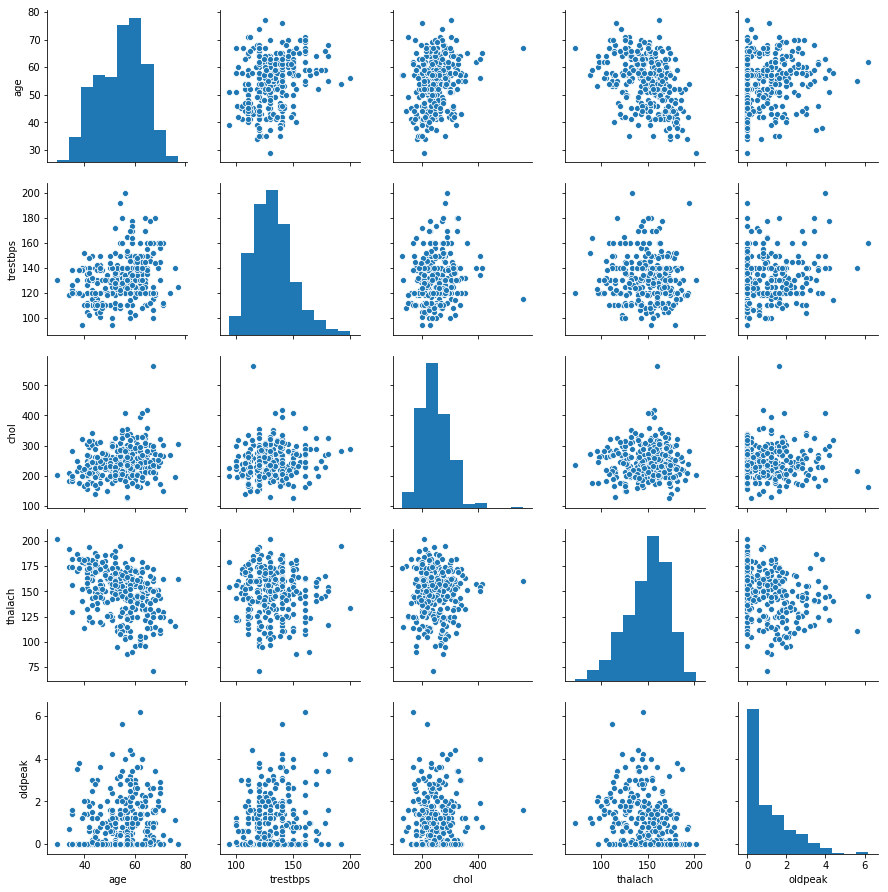

In [4]:
sns.pairplot(data[['age','trestbps','chol','thalach','oldpeak']])

In [5]:
X = np.array(data.iloc[:,:-1])

In [6]:
y = np.array(data.iloc[:,-1]).reshape(-1,1)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)